# Lab Three, Multi-modal and Multi-task

Xingming Qu, Bowei Tian

## 1 Download the ChEMBL database or setup queries to download a subset go the database.


Thanks to Niraj for making this available to everyone!!!

In [1]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import pickle
warnings.simplefilter('ignore', DeprecationWarning)
warnings.filterwarnings("ignore")

In [2]:
f = open('data.csv', 'r', encoding="ISO-8859-1")
lines = f.readlines()
f.close()

In [3]:
total_record=len(lines)
print(total_record)

1065321


In [4]:
bug=[]

flis = [] # will have [id, ic50_val, unit, target, smiles] 

for line in lines[:1]: # first line contains the headers (therefore skiped)
    lis = line.strip().split(',')
    print(line)
    print(len(lis))

" M o l e c u l e " , " S t a n d a r d   T y p e " , " S t a n d a r d   R e l a t i o n " , " S t a n d a r d   V a l u e " , " S t a n d a r d   U n i t s " , " p C h E M B L   V a l u e " , " C o m m e n t " , " C o m p o u n d   K e y " , " A s s a y " , " A s s a y   D e s c r i p t i o n " , " B A O   F o r m a t " , " T a r g e t " , " T a r g e t   P r e f .   N a m e " , " T a r g e t   O r g a n i s m " , " T a r g e t   T y p e " , " D o c u m e n t " , " S o u r c e " , " M a x   P h a s e " , " # R o 5   V i o l a t i o n s " , " M o l e c u l a r   W e i g h t " , " L i g a n d   E f f i c i e n c y   B E I " , " L i g a n d   E f f i c i e n c y   L E " , " L i g a n d   E f f i c i e n c y   L L E " , " L i g a n d   E f f i c i e n c y   S E I " , " A L o g P " , " A s s a y   O r g a n i s m " , " A s s a y   T i s s u e   C h E M B L   I D " , " A s s a y   T i s s u e   N a m e " , " A s s a y   C e l l   T y p e " , " A s s a y   S u b c e l l u l a r   F r a c t 

We can see a record should have 43 columns

In [5]:
for line in lines[:10]: # first line contains the headers (therefore skiped)
    lis = line.strip().split(',')
    if len(lis)!=43:
        print(line)
        print(len(lis))

 " C H E M B L 3 5 7 3 3 8 " , " I C 5 0 " , " > " , " 5 0 0 0 0 " , " n M " , " " , " " , " 1 6   2 - g " , " C H E M B L 8 1 2 4 4 6 " , " I n h i b i t o r y   a c t i v i t y   a g a i n s t   T r y p a n o s o m a   c r u z i   t r y p a n o t h i o n e   d i s u l f i d e   r e d u c t a s e ,   a s s a y   i n   p r e s e n c e   o f   5 7   u M   T ( S ) 2 . " , " s i n g l e   p r o t e i n   f o r m a t " , " C H E M B L 5 1 3 1 " , " T r y p a n o t h i o n e   r e d u c t a s e " , " T r y p a n o s o m a   c r u z i " , " S I N G L E   P R O T E I N " , " C H E M B L 1 1 3 4 7 9 1 " , " S c i e n t i f i c   L i t e r a t u r e " , " 0 " , " 0 " , " 3 2 6 . 4 " , " " , " " , " " , " " , " 1 . 9 4 " , " T r y p a n o s o m a   c r u z i " , " " , " " , " " , " " , " 5 6 9 3 " , " B A O _ 0 0 0 0 3 5 7 " , " " , " " , " " , " " , " C N 1 C C N ( C C 1 ) C ( = O ) C C C 2 = C ( C ) C ( = O ) c 3 c c c c c 3 C 2 = O " , " " , " J .   M e d .   C h e m . " , " 2 0 0 1 " , " 1 "

Here we can see <br>
 Inhibitory activity against Trypanosoma cruzi trypanothione disulfide reductase, assay in presence of 57 uM T(S)2.<br>
 There is a , in the sentence. So we can not use split(',')
 



In [6]:
bug=[]
for line in lines[1:]: # first line contains the headers (therefore skiped)
    lis = line.strip().split(',')
    if len(lis)!=43:
        bug.append(len(lis))
len(bug)

295467

useing split(',') will damage 295467 records

In [7]:
c=set(bug)
print(c)

{1, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 78, 79, 80, 81, 83, 84, 86, 99}


So we can see we have lots of records length >43, it is becuase we have , inside sentence

Consider <br>
"CHEMBL357338","IC50",">","50000","nM","","","16 2-g","CHEMBL812446","Inhibitory activity against Trypanosoma cruzi trypanothione disulfide reductase, assay in presence of 57 uM T(S)2.","single protein format","CHEMBL5131",

We could replace "," to a rare punctuation like "!" and use ! to split

In [8]:
test=lines[0]
te=''
for ch in test:
    te=te+ch

te=te.replace('\x00','')
te=te.strip()
te=te.replace('","','"!"')
te=te.replace('"','')
te=te.split('!')

print(te,'\n')
print(len(te))
print(te[0])
print(te[3])
print(te[4])
print(te[8])
print(te[36])
# [id, ic50_val, unit, target, smiles]
# [0,3,4,8,36]

['Molecule', 'Standard Type', 'Standard Relation', 'Standard Value', 'Standard Units', 'pChEMBL Value', 'Comment', 'Compound Key', 'Assay', 'Assay Description', 'BAO Format', 'Target', 'Target Pref. Name', 'Target Organism', 'Target Type', 'Document', 'Source', 'Max Phase', '#Ro5 Violations', 'Molecular Weight', 'Ligand Efficiency BEI', 'Ligand Efficiency LE', 'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'ALogP', 'Assay Organism', 'Assay Tissue ChEMBL ID', 'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction', 'Organism Tax ID', 'BAO Format ID', 'Published Type', 'Published Relation', 'Published Value', 'Published Units', 'Canonical Smiles', 'Data Validity Comment', 'Document Journal', 'Document Year', 'SRC ID', 'UO Units', 'Potential Duplicate'] 

43
Molecule
Standard Value
Standard Units
Assay
Canonical Smiles


In [9]:
test=lines[1]
te=''
for ch in test:
    te=te+ch

te=te.replace('\x00','')
te=te.strip()
te=te.replace('","','"!"')
te=te.replace('"','')
te=te.split('!')

# print(te,'\n')
print(len(te))
print(te[0])
print(te[3])
print(te[4])
print(te[8])
print(te[36])
# [id, ic50_val, unit, target, smiles]
# [0,3,4,8,36]

43
CHEMBL17430
11600
nM
CHEMBL664913
Nc1nc(N)c2c(CSc3ccc(Cl)c(Cl)c3)c[nH]c2n1


In [10]:
miss_ic50=0
smiles=[]
target=[]
unit=[]
ic50=[]
it=0
new_bugs=[]
for line in lines[1:]: # first line contains the headers (therefore skiped)
    
    if it%100000==0:
        print(it/total_record,end='  ')
    it=it+1
    
    te=''
    for ch in line:
        te=te+ch
    
    te=te.replace('\x00','')
    te=te.strip()
    te=te.replace('","','"!"')
    te=te.replace('"','')
    te=te.split('!')


    if len(te)!=43:
        new_bugs.append(len(te))
    if len(te)==43:
        try:
            ic50.append(float(te[3]))
            smiles.append(te[36])
            target.append(te[8])
            unit.append(te[4])
        except:
            miss_ic50=miss_ic50+1

0.0  0.09386842087971607  0.18773684175943214  0.2816052626391482  0.3754736835188643  0.4693421043985803  0.5632105252782964  0.6570789461580124  0.7509473670377286  0.8448157879174446  0.9386842087971606  

In [11]:
print('bad records:',len(new_bugs))
print('clean data:',len(ic50))
print('data mised ic50:',miss_ic50)

bad records: 3853
clean data: 945997
data mised ic50: 115470


In [12]:
DATA_DICT={'target':target, 'smiles':smiles, 'unit':unit , 'ic50':ic50}
DATA=pd.DataFrame(data=DATA_DICT)
DATA.head()

,target,smiles,unit,ic50
0,CHEMBL664913,Nc1nc(N)c2c(CSc3ccc(Cl)c(Cl)c3)c[nH]c2n1,nM,11600.0
1,CHEMBL812106,NC(=S)\N=N\c1c(O)[nH]c2ccc(I)cc12,nM,9000.0
2,CHEMBL811877,[Cl-].C[N+](C)(CCCN1c2ccccc2Sc3ccc(Cl)cc13)Cc4...,nM,17900.0
3,CHEMBL664920,COc1cc(OC)cc(c1)N(C)Cc2c[nH]c3nc(N)nc(O)c23,nM,4200.0
4,CHEMBL664913,COc1cc(Cc2cnc(N)nc2N)cc(OC)c1OC,nM,2700.0


In [ ]:
len(DATA)
DATA.to_pickle("./clean_data.pkl")

In [4]:
DATA = pd.read_pickle("./clean_data.pkl")

## 2  Filter the database to the top 100 targets in the database. You will need a definition of "top" such as the targets with the most assays. From these top 100 targets, save the ligands that have an assay result for each of the targets. 



In [5]:
unitcounts=DATA['unit'].value_counts()
unitcounts

nM                 940733
ug.mL-1              4953
                      146
%                      34
/uM                    25
milliequivalent        20
ppm                    18
p.p.m.                 10
uM tube-1               9
min                     9
molar ratio             8
ucm                     6
mg kg-1                 6
nmol/mg                 5
mg.min/m3               4
ug                      3
ucm/s                   2
umol/dm3                2
10'7nM                  1
10'8nM                  1
10'-4umol/L             1
10'13nM                 1
Name: unit, dtype: int64

In [6]:
Filtered_data= DATA[DATA['unit']=='nM']

In [7]:
len(Filtered_data)

940733

In [8]:
# count each target has how many element
counts=Filtered_data['target'].value_counts()
counts

CHEMBL2114881    2057
CHEMBL2114714    1381
CHEMBL1738239    1210
CHEMBL1614190    1205
CHEMBL1963883    1186
CHEMBL1963941    1186
CHEMBL1614432    1128
CHEMBL1614529    1106
CHEMBL3888191    1062
CHEMBL2328568    1017
CHEMBL1738498    1013
CHEMBL1794550    1013
CHEMBL2114818    1011
CHEMBL2114932    1011
CHEMBL1794574    1011
CHEMBL3562022     991
CHEMBL1738682     940
CHEMBL1738639     940
CHEMBL1794362     896
CHEMBL1613799     827
CHEMBL3881499     800
CHEMBL3888383     800
CHEMBL3436040     792
CHEMBL3436041     792
CHEMBL3436039     792
CHEMBL3705899     773
CHEMBL3888194     758
CHEMBL3705123     752
CHEMBL1614063     744
CHEMBL3887063     741
                 ... 
CHEMBL966664        1
CHEMBL2422660       1
CHEMBL2214439       1
CHEMBL3602942       1
CHEMBL3395555       1
CHEMBL757027        1
CHEMBL2321558       1
CHEMBL4004222       1
CHEMBL749746        1
CHEMBL3887556       1
CHEMBL3999268       1
CHEMBL4031422       1
CHEMBL899839        1
CHEMBL3407092       1
CHEMBL2350

In [10]:
Pick_top=4000
sum(counts[:Pick_top])

396118

 Get top 100 targets in the database. 
 
 Here we define "top" as the targets with the most assays. 

In [11]:
top_target= counts.index[:Pick_top]
top_target

Index(['CHEMBL2114881', 'CHEMBL2114714', 'CHEMBL1738239', 'CHEMBL1614190',
       'CHEMBL1963883', 'CHEMBL1963941', 'CHEMBL1614432', 'CHEMBL1614529',
       'CHEMBL3888191', 'CHEMBL2328568',
       ...
       'CHEMBL3586840', 'CHEMBL2090704', 'CHEMBL3705701', 'CHEMBL1686964',
       'CHEMBL3705874', 'CHEMBL3132260', 'CHEMBL3598804', 'CHEMBL886046',
       'CHEMBL860989', 'CHEMBL1738428'],
      dtype='object', length=4000)

In [12]:
Filtered_data= Filtered_data[Filtered_data['target'].isin(top_target)]
Filtered_data[:10]


,target,smiles,unit,ic50
5,CHEMBL812446,CN1CCN(CC1)C(=O)CCC2=C(C)C(=O)c3ccccc3C2=O,nM,50000.0
8,CHEMBL665702,CN(Cc1ccc2nc(N)nc(N)c2n1)c3cccc(Cl)c3,nM,20.0
9,CHEMBL1677388,COC(OC)c1ccc(C#N)c(SCC(=O)c2ccc(Cl)cc2)n1,nM,10000.0
15,CHEMBL665590,COc1cc(NCc2ccc3nc(N)nc(N)c3c2C)cc(OC)c1OC,nM,10.0
16,CHEMBL812446,CN1CCN(CCCNC(=O)CCCC2=C(C)C(=O)c3cccc(O)c3C2=O...,nM,32000.0
18,CHEMBL660279,FC(F)(F)c1cc(\C=N\NC(=N)S)cc(c1)C(F)(F)F,nM,320.0
19,CHEMBL811879,NCCCN1c2ccccc2Sc3ccccc13,nM,1412000.0
20,CHEMBL665590,COc1ccc(OC)c(c1)N(C)Cc2cnc3nc(N)nc(N)c3c2C,nM,28.0
21,CHEMBL665590,Nc1nc(N)c2cc(CNc3cccc4ccccc34)ccc2n1,nM,27.0
22,CHEMBL665590,COc1ccc(NCc2cnc3nc(N)nc(N)c3c2C)cc1OC,nM,2.7


In [13]:
len(Filtered_data)


396118

## 3  Binarize the binding affinity for each ligand in the assay. That is, convert the continuous measure of binding to binary. You should use the column 'IC50' for this calculation. Anything below 300 nM should be considered as an active binding. Anything above 10 uM should be considered non-binding (inactive). 

below 300 nM should be considered as an active binding -->1<br>
Anything above 10 uM should be considered non-binding (inactive)--->0

10 uM=10000 nm

Let's count how many records are belong to 0 and 1

In [14]:
# first we throw all the data between 300 and 10000
df=Filtered_data.copy()
before_drop=len(df)
print('Before',before_drop)

df.drop(df[(df.ic50 > 300) & (df.ic50 < 10000) ].index, inplace=True)
print('After',len(df))
print('droped',before_drop-len(df))

Before 396118
After 278953
droped 117165


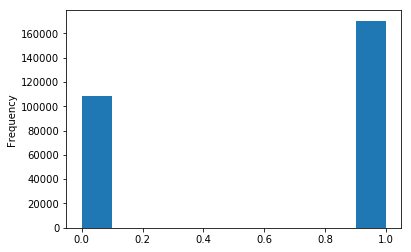

In [15]:
test=df.copy()
test['ic50'][(test.ic50 <= 300)]=1
test['ic50'][(test.ic50 >= 10000)]=0
test['ic50'].plot.hist()

In [16]:
test.ic50.value_counts()

1.0    170283
0.0    108670
Name: ic50, dtype: int64

In [17]:
Binarized_data=test.copy()
Binarized_data[:10]

,target,smiles,unit,ic50
5,CHEMBL812446,CN1CCN(CC1)C(=O)CCC2=C(C)C(=O)c3ccccc3C2=O,nM,0.0
8,CHEMBL665702,CN(Cc1ccc2nc(N)nc(N)c2n1)c3cccc(Cl)c3,nM,1.0
9,CHEMBL1677388,COC(OC)c1ccc(C#N)c(SCC(=O)c2ccc(Cl)cc2)n1,nM,0.0
15,CHEMBL665590,COc1cc(NCc2ccc3nc(N)nc(N)c3c2C)cc(OC)c1OC,nM,1.0
16,CHEMBL812446,CN1CCN(CCCNC(=O)CCCC2=C(C)C(=O)c3cccc(O)c3C2=O...,nM,0.0
19,CHEMBL811879,NCCCN1c2ccccc2Sc3ccccc13,nM,0.0
20,CHEMBL665590,COc1ccc(OC)c(c1)N(C)Cc2cnc3nc(N)nc(N)c3c2C,nM,1.0
21,CHEMBL665590,Nc1nc(N)c2cc(CNc3cccc4ccccc34)ccc2n1,nM,1.0
22,CHEMBL665590,COc1ccc(NCc2cnc3nc(N)nc(N)c3c2C)cc1OC,nM,1.0
25,CHEMBL886170,CN(C)Cc1ccn2c(c3ccnc(NC(=O)C4CCCC4)n3)c(nc2c1)...,nM,1.0


In [18]:
Binarized_data.to_pickle("Binarized_data.pkl")

In [19]:
Binarized_data= pd.read_pickle("Binarized_data.pkl")

## 4  Featurize each ligand using RDKit (https://www.rdkit.org (Links to an external site.)Links to an external site.). This will convert the ligand representation into a binary vector of features. Mention any hyper parameters you use.


In [20]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys, AllChem
from rdkit.Avalon import pyAvalonTools as fpAvalon
from rdkit.Chem.AtomPairs import Pairs, Torsions
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.ChemicalFeatures import BuildFeatureFactory
from rdkit.Chem import rdMolDescriptors
import pandas as pd
import argparse
import textwrap
import getopt
from argparse import ArgumentParser
import time

In [21]:
def CalculateFP_mod(smiles, N_BITS=256):
    m = Chem.MolFromSmiles(smiles)
    if m is None:
        raise ValueError('SMILES cannot be converted to a RDKit molecules:', smiles)

    return AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=N_BITS)

In [22]:
# convert smile to np arr bitvector
def smile2BitVect_nparr(smiles):
    bitstr=CalculateFP_mod(smiles,256).ToBitString()
    bitvector=np.array([int(i) for i in bitstr])
    return bitvector
        

#### The hyper parameters used here are radius and the length of bit vector. I looked the RDKit document and almost all their examples were using radius=2 as default. So we will not change the radius.

For length of bit vector we first calculate the number of 1. As you can see the test below, it is sparse. So we do not need to set the length too long.

In [23]:
c=smile2BitVect_nparr('CCN1[C@@H](CCCC1=O)C(=O)NCc2cccc(c2Cl)C(F)(F)F')
c

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [24]:
print(CalculateFP_mod('CCN1[C@@H](CCCC1=O)C(=O)NCc2cccc(c2Cl)C(F)(F)F',128).ToBitString().count('1') )
print(CalculateFP_mod('CCN1[C@@H](CCCC1=O)C(=O)NCc2cccc(c2Cl)C(F)(F)F',256).ToBitString().count('1') )
print(CalculateFP_mod('CCN1[C@@H](CCCC1=O)C(=O)NCc2cccc(c2Cl)C(F)(F)F',512).ToBitString().count('1') )
print(CalculateFP_mod('CCN1[C@@H](CCCC1=O)C(=O)NCc2cccc(c2Cl)C(F)(F)F',1024).ToBitString().count('1') )

40
48
50
51


256 should be a suitable number. Because when reduced from 1024-512 and 512-256 the number of 1 only reduced 1 and 2 

In [42]:
# init our new data set after pre-processing 
# it will be a dict and key is the name of target and value is a list
# list[0] save bitvect and list[1] save label
tasks ={}
for each_target in top_target:
    tasks[each_target]=[[],[],[]]
    # 0 save bit vector 
    # 1 save label
    # 2 save the ratio of 1/0 in label
        

In [43]:
# some items has missed smile or their smile is a float number or their smile is something other than a smile
# so we just need to remove them
# 
missed_smile=0
for i in range(len(Binarized_data)):
    item=Binarized_data.iloc[i]
    
    target=item.target
    each_label= int(item.ic50)
    smile=item.smiles

    try: # try if convert failed 
        bitvector=smile2BitVect_nparr(smile)
        tasks[target][0].append(bitvector)
        tasks[target][1].append(each_label)
    except:
        missed_smile=missed_smile+1
print('missed smile',missed_smile)
    

missed smile 1


In [44]:
# convert trainning data into np array
for key,value in tasks.items():
    value[0]=np.array(value[0])
    value[1]=np.array(value[1])

In [45]:
def check_if_all_zero_or_all_ones(label):
    length=len(label)
    if length==0:
        return 0
    ones=sum(label)
    ratio=ones/length
    return ratio
    

In [46]:
for key,value in tasks.items():
    ratio=check_if_all_zero_or_all_ones(value[1])
    value[2]=ratio


In [47]:
# you can see how many records a target has
times=0
for key,value in tasks.items():
    print(key,value[0].shape,value[1].shape,value[2])
    
    times=times+1
    if times ==30:
        break

CHEMBL2114881 (2031, 256) (2031,) 0.0
CHEMBL2114714 (1346, 256) (1346,) 0.0
CHEMBL1738239 (1051, 256) (1051,) 0.0
CHEMBL1614190 (892, 256) (892,) 0.0011210762331838565
CHEMBL1963883 (1186, 256) (1186,) 0.0
CHEMBL1963941 (1186, 256) (1186,) 0.0
CHEMBL1614432 (621, 256) (621,) 0.0
CHEMBL1614529 (164, 256) (164,) 0.0
CHEMBL3888191 (947, 256) (947,) 0.996832101372756
CHEMBL2328568 (585, 256) (585,) 0.8341880341880342
CHEMBL1738498 (651, 256) (651,) 0.0015360983102918587
CHEMBL1794550 (958, 256) (958,) 0.0
CHEMBL2114818 (369, 256) (369,) 0.02168021680216802
CHEMBL2114932 (304, 256) (304,) 0.03289473684210526
CHEMBL1794574 (244, 256) (244,) 0.0
CHEMBL3562022 (709, 256) (709,) 0.0014104372355430183
CHEMBL1738682 (497, 256) (497,) 0.08048289738430583
CHEMBL1738639 (331, 256) (331,) 0.13595166163141995
CHEMBL1794362 (537, 256) (537,) 0.020484171322160148
CHEMBL1613799 (571, 256) (571,) 0.0
CHEMBL3881499 (625, 256) (625,) 0.9776
CHEMBL3888383 (722, 256) (722,) 0.997229916897507
CHEMBL3436040 (42

In [48]:
# you can see how many records a target has
filtered_tasks={}
T=0.2
for key,value in tasks.items():
    if value[2]>T and value[2]<1-T:
        filtered_tasks[key]= tasks[key]


In [49]:
# you can see how many records a target has
times=0
for key,value in filtered_tasks.items():
    print(key,value[0].shape,value[1].shape,value[2])
    times=times+1
    if times ==30:
        break

CHEMBL3705476 (231, 256) (231,) 0.7748917748917749
CHEMBL3887333 (319, 256) (319,) 0.6394984326018809
CHEMBL3705983 (215, 256) (215,) 0.4372093023255814
CHEMBL3705790 (274, 256) (274,) 0.7335766423357665
CHEMBL3706316 (331, 256) (331,) 0.7885196374622356
CHEMBL1119333 (315, 256) (315,) 0.7936507936507936
CHEMBL3705699 (141, 256) (141,) 0.7730496453900709
CHEMBL3705791 (214, 256) (214,) 0.7897196261682243
CHEMBL3705631 (216, 256) (216,) 0.49537037037037035
CHEMBL3705264 (120, 256) (120,) 0.5416666666666666
CHEMBL3734165 (214, 256) (214,) 0.6121495327102804
CHEMBL1614377 (249, 256) (249,) 0.3855421686746988
CHEMBL3888435 (93, 256) (93,) 0.20430107526881722
CHEMBL3887866 (150, 256) (150,) 0.7866666666666666
CHEMBL3705844 (149, 256) (149,) 0.785234899328859
CHEMBL3889241 (174, 256) (174,) 0.6896551724137931
CHEMBL3705773 (111, 256) (111,) 0.36036036036036034
CHEMBL1794546 (27, 256) (27,) 0.48148148148148145
CHEMBL3880113 (207, 256) (207,) 0.6183574879227053
CHEMBL1738482 (41, 256) (41,) 0.

In [50]:
# ll=tasks['CHEMBL3705983'][1]
# # ll=[0,0,0,0,0,0,0,0,1,1,1]
# ll

In [51]:
total=0
for key,value in filtered_tasks.items():
    total=total+value[0].shape[0]
#     print(key,value[0].shape,value[1].shape)
print('After remove invaild smiles,and very imbalanced data we have: ',total)

After remove invaild smiles,and very imbalanced data we have:  24792


In [52]:
all_ones=0
for key,value in filtered_tasks.items():
    ones=sum(value[1])
    all_ones=all_ones+ones

print('1:', all_ones )
print('0:', total-all_ones)

1: 13681
0: 11111


In [54]:
pickle_out = open("filtered_tasks.pickle","wb")
pickle.dump(filtered_tasks, pickle_out)

In [2]:
pickle_in = open("filtered_tasks.pickle","rb")
filtered_tasks = pickle.load(pickle_in)
print('All task Number:',len(filtered_tasks))

All task Number: 674


In [3]:
print('All task Number:',len(filtered_tasks))

All task Number: 674


## 5 Train a multi-task model (one model for each target). Use an 80/20 split for each target.


In [4]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split
inputs = Input(shape=(256,))
shared_mlp = Dense(32, activation='relu')(inputs)
# x = Dropout(0.5)(x)
shared_mlp = Dense(32, activation='relu')(shared_mlp)

# make a dictionary of models for each task
models_mtl = dict()

for x in filtered_tasks.keys():
    personal_layer = Dense(10, activation='relu')(shared_mlp)
    output_layer = Dense(1,activation='sigmoid')(personal_layer)
    model = Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer='sgd', loss='mean_squared_error')
    models_mtl[x] = model

Using TensorFlow backend.


In [5]:
X_train = dict()
y_train = dict()
X_test = dict()
y_test = dict()

for x in filtered_tasks.keys():
    X_train[x], X_test[x], y_train[x], y_test[x] = train_test_split(filtered_tasks[x][0], 
                                                        filtered_tasks[x][1], 
                                                        test_size=0.2, 
                                                        random_state=42)

In [6]:
%%time
EPOCHS = 10
from random import shuffle

all_keys = [key  for key,_ in filtered_tasks.items()]
print(len(all_keys))
for i in range(EPOCHS):
    print('Epoch',i,end=', ')
    shuffle(all_keys)
    for x in all_keys:
        models_mtl[x].fit(X_train[x],y_train[x], verbose=0)
        print('training on',X_train[x].shape, end='        ')

674


Epoch 0, training on (30, 256)        training on (6, 256)        training on (13, 256)        training on (28, 256)        training on (19, 256)        training on (20, 256)        training on (20, 256)        training on (12, 256)        training on (16, 256)        training on (20, 256)        training on (21, 256)        training on (26, 256)        training on (31, 256)        training on (3, 256)        training on (8, 256)        training on (31, 256)        training on (24, 256)        training on (20, 256)        training on (14, 256)        training on (67, 256)        training on (16, 256)        training on (31, 256)        training on (15, 256)        training on (172, 256)        training on (17, 256)        training on (19, 256)        training on (44, 256)        training on (16, 256)        training on (73, 256)        training on (39, 256)        training on (73, 256)        training on (8, 256)        training on (20, 256)        training on (17, 256)        training

training on (7, 256)        training on (14, 256)        training on (36, 256)        training on (13, 256)        training on (15, 256)        training on (15, 256)        training on (16, 256)        training on (88, 256)        training on (35, 256)        training on (19, 256)        training on (28, 256)        training on (13, 256)        training on (27, 256)        training on (10, 256)        training on (24, 256)        training on (32, 256)        training on (14, 256)        training on (172, 256)        training on (29, 256)        training on (5, 256)        training on (36, 256)        training on (30, 256)        training on (16, 256)        training on (9, 256)        training on (20, 256)        training on (26, 256)        training on (17, 256)        training on (8, 256)        training on (70, 256)        training on (27, 256)        training on (31, 256)        training on (119, 256)        training on (34, 256)        training on (20, 256)        training on (24,

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/conda/lib/python3.6/site-packages/IPython/core/magics/execution.py", line 1237, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 10, in <module>
  File "/conda/lib/python3.6/site-packages/keras/engine/training.py", line 1037, in fit
    validation_steps=validation_steps)
  File "/conda/lib/python3.6/site-packages/keras/engine/training_arrays.py", line 199, in fit_loop
    outs = f(ins_batch)
  File "/conda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 2658, in __call__
    if hasattr(get_session(), '_make_callable_from_options'):
  File "/conda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 204, in get_session
    session.run(tf.variables_initializer(uninitialized_vars))
  File "/conda/lib/python3.6/site-packages/tensorflow/python/client/session.py", line 877, in run
    run_metadata_ptr)
  File "/conda/lib/python3.6/site-packages/tensorflow/python/client/session.py", line 110

KeyboardInterrupt: 

In [7]:
%%time
y_mtl=[]
yhat_mtl=[]

for x in X_test.keys():
    yhat_mlp = models_mtl[x].predict(X_test[x])

    y_mtl.append(y_test[x].ravel())
    yhat_mtl.append(yhat_mlp.ravel())

KeyboardInterrupt: 

In [8]:
final_y_gt=np.concatenate(y_mtl)
final_y_hat=np.concatenate(yhat_mtl)
final_y_hat=np.round(final_y_hat)

ValueError: need at least one array to concatenate

In [ ]:

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score(final_y_hat,final_y_gt)


## 6 Report the results using AUC, BEDROC, and Enrichment factor. These metrics are easily calculated using the RDKit scoring library. Discuss the results (you will need to look up each evaluation metric to interpret the result). You may be interested in page 6 of the following document: https://www.dropbox.com/s/6je37ml475vg3ep/Srinivas2018ImplictDescriptorUnderReview.pdf?dl=0 (Links to an external site.)Links to an external site. 

## 7  Finally, you have free reign to perform any other analysis. A suggested analysis is to add an additional mode of input data such as another fingerprint for each ligand. 